# Step 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import scipy.signal as signal
import scipy

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import helpers
import features
import plotting
import ai_models
import ai_func as aif
import statistics as sf
import importlib

In [2]:
# when making changes inside a library use this to reload that library
importlib.reload(aif)

<module 'ai_func' from 'C:\\Users\\shank\\Desktop\\AUMC\\colab\\aumc-video-dys\\ai_func.py'>

# Step 2: Settings

In [3]:
folder_sit = 'data_sitting_052020/'
suffix_sit = '_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv'
folder_ly = 'data_lying_052020_retrain/'
suffix_ly = '_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv'

# These variables are global and are accessed inside the functions, changing them here applies it automatically to all the code
settings = {}
settings['filt_on'] = False
settings['likeli_on'] = True
settings['cutoff_on'] = True
settings['normalize_on'] = True

settings['likeli'] = 0.7
settings['cutoff'] = 50
settings['filt'] = helpers.get_filter(10, 0.001, 1, 25, 'lp')

settings['ntrials'] = 93
settings['fps'] = 25
settings['dt'] = 1/settings['fps']
settings['heights_file'] = 'subject characteristics IDYS.xlsx'

# Step 3: Get file numbers

In [4]:
indexes = helpers.get_indexes(folder_sit)
numbers = helpers.get_filenumbers(folder_sit)

# Step 4: Read and store the features
This code loops through all the files and stores all the features in their respective DataFrame. Afterwards distributions, statistics and statistics over multiple parts can be calculated on each feature as you like.

In [5]:
df_xys_sit, df_pols_sit, df_dtmps_sit, df_dtls_sit, df_angles_sit, df_velocities_sit, df_accelerations_sit, df_nans_sit = features.get_features(folder_sit, suffix_sit, settings)

001_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
002_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
003_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
004_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
005_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
006_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
007_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
008_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
009_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
010_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
012_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
016_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
017_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
018_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
019_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
020_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
021_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
022_02DLC_resnet101_02Apr28shuffle1_200000filtered.csv
023_02DLC_

In [6]:
df_xys_ly, df_pols_ly, df_dtmps_ly, df_dtls_ly, df_angles_ly, df_velocities_ly, df_accelerations_ly, df_nans_ly = features.get_features(folder_ly, suffix_ly, settings)

001_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
002_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
003_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
004_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
005_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
006_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
007_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
008_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
009_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
010_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
012_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
016_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
017_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
018_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
019_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
020_19DLC_resnet101_ESMAC_19Apr16shuffle1_200000filtered.csv
021_19DLC_resnet101_ESMA

## Get distributions
This code checks how a certain feature is distributed over different thresholds. 

For example: applying get_distribution(x, [0.1,0.2, ... , 1.0]) over the velocities gives you back an array of 11 values containing the percentage of how many values are under 0.1, between 0.1 and 0.2, between 0.2 and 0.3, ... , between 0.9 and 1.0 and above 1.0. 

In [7]:
df_vel_distr_sit = df_velocities_sit.applymap(lambda x: sf.get_distribution(x, (np.array(range(10))+1)/10))
df_acc_distr_sit = df_accelerations_sit.applymap(lambda x: sf.get_distribution(x, (np.array(range(-25,30,5)))))
df_ang_distr_sit = df_angles_sit.loc[:,['Angle Elbow']].applymap(lambda x: sf.get_distribution(x, (np.array(range(10))+1)/10))

df_vel_distr_ly = df_velocities_ly.applymap(lambda x: sf.get_distribution(x, (np.array(range(10))+1)/10))
df_acc_distr_ly = df_accelerations_ly.applymap(lambda x: sf.get_distribution(x, (np.array(range(-25,30,5)))))
df_ang_distr_ly = df_angles_ly.loc[:,['Angle Knee']].applymap(lambda x: sf.get_distribution(x, (np.array(range(10))+1)/10))

## Get statistics
Get standard statistics of different features such as mean, median, std, rms, etc.

In [8]:
df_vel_mean_sit = df_velocities_sit.applymap(lambda x: np.nanmean(x))
df_vel_median_sit = df_velocities_sit.applymap(lambda x: np.nanmedian(x))
df_vel_std_sit = df_velocities_sit.applymap(lambda x: np.nanstd(x))
df_vel_rms_sit = df_velocities_sit.applymap(lambda x: np.sqrt(np.nanmean(x**2)))

df_acc_mean_sit = df_accelerations_sit.applymap(lambda x: np.nanmean(x))
df_acc_median_sit = df_accelerations_sit.applymap(lambda x: np.nanmedian(x))

df_dtl_mean_sit = df_dtls_sit.applymap(lambda x: np.nanmean(x))
df_dtl_median_sit = df_dtls_sit.applymap(lambda x: np.nanmedian(x))

c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [9]:
df_vel_mean_ly = df_velocities_ly.applymap(lambda x: np.nanmean(x))
df_vel_median_ly = df_velocities_ly.applymap(lambda x: np.nanmedian(x))
df_vel_std_ly = df_velocities_ly.applymap(lambda x: np.nanstd(x))
df_vel_rms_ly = df_velocities_ly.applymap(lambda x: np.sqrt(np.nanmean(x**2)))

df_acc_mean_ly = df_accelerations_ly.applymap(lambda x: np.nanmean(x))
df_acc_median_ly = df_accelerations_ly.applymap(lambda x: np.nanmedian(x))

df_dtl_mean_ly = df_dtls_ly.applymap(lambda x: np.nanmean(x))
df_dtl_median_ly = df_dtls_ly.applymap(lambda x: np.nanmedian(x))

### Get statistics for multiple parts 
If one statistic over the whole video is too generalized (e.g. the average speed of the full 20 seconds) you can use the get_per_part(x, N, statistic) to calculate the statistic over N parts. get_per_part(x, 10, np.nanmean) gives you back an array of length 10 which contains the averages of the first 2 seconds, the second 2 seconds, ... and the last 2 seconds.

In [10]:
df_vel_multiple_mean_ly = df_velocities_ly.applymap(lambda x: sf.get_per_part(x, 10, np.nanmean))
df_vel_multiple_median_ly = df_velocities_ly.applymap(lambda x: sf.get_per_part(x, 10, np.nanmedian))

In [11]:
df_dtmps_multiple_median_ly = df_dtmps_ly.applymap(lambda x: sf.get_per_part(x, 10, np.nanmedian))
df_dtls_multiple_median_ly = df_dtls_ly.applymap(lambda x: sf.get_per_part(x, 10, np.nanmedian))
df_angles_multiple_median_ly = df_angles_ly.applymap(lambda x: sf.get_per_part(x, 10, np.nanmedian))

In [21]:
df_dtls_multiple_median_ly['dtls Knee']['071 right']

KeyError: '071 right'

# Step 5: Get the scores


Read the scores for the CO scorer

In [42]:
# get the scores from only CO
df_out = pd.read_excel('2021_6-8_Scoring_DIS_proximal_trunk.xlsx')[['video', 'time', 'scorer', 'T0_DIS_D_RLP_R_tA_pscore', 'T0_DIS_D_LLP_R_tA_pscore']]
df_out = df_out.loc[(df_out['scorer'] == 'CO')&(df_out['T0_DIS_D_RLP_R_tA_pscore']!=999)&(df_out['T0_DIS_D_LLP_R_tA_pscore']!=999)]

# get the numbers + indexes of the CO videos
numbers_co = [helpers.fix_video_id(video) for video in df_out['video'].values]
if '071' in numbers_co:
    numbers_co.remove('071')
indexes_co = []
for n in numbers_co:
    df_out = df_out[df_out.video != 71]
    indexes_co.extend([n+' right', n+' left'])

# set index to the new videonumbers
df_out.index = numbers_co

# restructure right and left
df_y_co = pd.DataFrame(index = indexes_co, columns = ['DYS lower'])
for number in numbers_co:
    df_y_co.loc[number+' right', 'DYS lower'] = df_out.loc[number, 'T0_DIS_D_RLP_R_tA_pscore']
    df_y_co.loc[number+' left', 'DYS lower'] = df_out.loc[number, 'T0_DIS_D_LLP_R_tA_pscore']
    
df_y_co

,DYS lower
001 right,0.75
001 left,0.75
031 right,0.5
031 left,0.5
064 right,0.5
...,...
098 left,0.75
012 right,0.25
012 left,0.25
102 right,0.25


Read the DYS and CA scores for the lower and upper body for both the legs.

In [13]:
indexes = helpers.get_indexes(folder_sit)
numbers = helpers.get_filenumbers(folder_sit)
# get scores for all videos
df_output = pd.read_excel('DIS_output.xlsx',index_col=0)
df_y = pd.DataFrame(index = indexes, columns = ['DYS lower', 'CA lower', 'DYS upper', 'CA upper'])
for number in numbers:
    df_y.loc[number+' right', 'DYS lower'] = df_output.loc[int(number), 'DYS_right_lower']
    df_y.loc[number+' left', 'DYS lower'] = df_output.loc[int(number), 'DYS_left_lower']
    df_y.loc[number+' right', 'CA lower'] = df_output.loc[int(number), 'CA_right_lower']
    df_y.loc[number+' left', 'CA lower'] = df_output.loc[int(number), 'CA_left_lower']
    df_y.loc[number+' right', 'DYS upper'] = df_output.loc[int(number), 'DYS_right_upper']
    df_y.loc[number+' left', 'DYS upper'] = df_output.loc[int(number), 'DYS_left_upper']
    df_y.loc[number+' right', 'CA upper'] = df_output.loc[int(number), 'CA_right_upper']
    df_y.loc[number+' left', 'CA upper'] = df_output.loc[int(number), 'CA_left_upper']
    
df_y

,DYS lower,CA lower,DYS upper,CA upper
001 right,0.8125,0.875,0.9375,0
001 left,0.875,0.75,0.75,0
002 right,0.8125,0.5,0.125,0
002 left,0.6875,0.5,0.125,0
003 right,0.6875,0,0.875,0
...,...,...,...,...
110 left,0.625,0,0.9375,0
111 right,0.4375,0,0.9375,0
111 left,0.5,0,0.6875,0
112 right,0.3125,0,0.5,0


## Step 5 - The following part is optional:

#### Compare the model to the other scorers

In [115]:
df_out_co = pd.read_excel('2021_6-8_Scoring_DIS_proximal_trunk.xlsx')[['video', 'time', 'scorer', 'T0_DIS_D_RLP_R_tA_pscore', 'T0_DIS_D_LLP_R_tA_pscore']]
df_out_co = df_out_co.loc[(df_out_co['scorer'] == 'CO')&(df_out_co['T0_DIS_D_RLP_R_tA_pscore']!=999)&(df_out_co['T0_DIS_D_LLP_R_tA_pscore']!=999)]

df_out_no_co = pd.read_excel('2021_6-8_Scoring_DIS_proximal_trunk.xlsx')[['video', 'time', 'scorer', 'T0_DIS_D_RLP_R_tA_pscore', 'T0_DIS_D_LLP_R_tA_pscore']]
df_out_no_co = df_out_no_co.loc[(df_out_no_co['scorer'] != 'CO')&(df_out_no_co['T0_DIS_D_RLP_R_tA_pscore']!=999)&(df_out_no_co['T0_DIS_D_LLP_R_tA_pscore']!=999)]

In [117]:
co = df_out_co['video'].values
no_co = df_out_no_co['video'].values
co

array([  1,  31,  64, 112, 105,  51,  73,   2,  74,  47,  75, 106, 111,
       110, 107,  52,  76, 109,   3,  77,  46,  78,  53,  79,   4,  80,
        45,  81,  54,  82,   5,  83,  44,  84,  55,  85,   6,  86,  43,
        87,  56,  88,   7,  89,  42,  57,   8,  91,  41,  92,  93,   9,
        94,  40,  95,  59,  10,  97,  39,  98,  12, 102], dtype=int64)

In [146]:
df_out2 = pd.read_excel('2021_6-8_Scoring_DIS_proximal_trunk.xlsx')[['video', 'time', 'scorer', 'T0_DIS_D_RLP_R_tA_pscore', 'T0_DIS_D_LLP_R_tA_pscore']]
df_out2 = df_out2.loc[(df_out2['scorer'] == 'KBO')&(df_out2['T0_DIS_D_RLP_R_tA_pscore']!=999)&(df_out2['T0_DIS_D_LLP_R_tA_pscore']!=999)]

# get the numbers + indexes of the CO videos
numbers = [helpers.fix_video_id(video) for video in df_out2['video'].values]
indexes = []
for n in numbers:
    indexes.extend([n+' right', n+' left'])

# set index to the new videonumbers
df_out2.index = numbers

In [149]:
# restructure right and left
df_y2 = pd.DataFrame(index = indexes, columns = ['DYS lower'])
for number in numbers:
    try:
        df_y2.loc[number+' right', 'DYS lower'] = df_out2.loc[number, 'T0_DIS_D_RLP_R_tA_pscore']
        df_y2.loc[number+' left', 'DYS lower'] = df_out2.loc[number, 'T0_DIS_D_LLP_R_tA_pscore']
        df_y2.loc[number+' right', 'DYS lower2'] = df_out.loc[number, 'T0_DIS_D_RLP_R_tA_pscore']
        df_y2.loc[number+' left', 'DYS lower2'] = df_out.loc[number, 'T0_DIS_D_LLP_R_tA_pscore']
    except:
        print('not in both:', number)

not in both: 064
not in both: 002
not in both: 074
not in both: 106
not in both: 111
not in both: 052
not in both: 076
not in both: 109
not in both: 046
not in both: 078
not in both: 004
not in both: 080
not in both: 054
not in both: 082
not in both: 044
not in both: 084
not in both: 006
not in both: 086
not in both: 056
not in both: 088
not in both: 042
not in both: 008
not in both: 091
not in both: 093
not in both: 040
not in both: 095
not in both: 010
not in both: 097
not in both: 012
not in both: 102


In [161]:
a=np.array(df_y2['DYS lower'].values, dtype=float)
b=np.array(df_y2['DYS lower2'].values, dtype=float)
a = a[~np.isnan(a)]
b = b[~np.isnan(b)]

In [162]:
np.average(np.abs(a - b))

0.140625

# Step 6: AI
Set ai_settings here for the Keras models

In [14]:
ai_settings = {}
ai_settings['epochs'] = 100
ai_settings['batch_size'] = 32
ai_settings['verbose'] = 0
ai_settings['validation_split'] = 0.25
ai_settings['optimizer'] = 'adam'

## Standard Algorithms
Add whatever features you like here to the standard algorithms. This can be distributions, statistics and statistics over multiple parts. All calculated over the base features such as speed, acceleration, angle, etc.

The function run_plot_standard() takes in the data, the settings, the amount of outputs (only CA/DYS or both) and the type of model. It returns the accuracy and plots the model's output.

The function run_standard_experiment() takes the same arguments but also a variable of how many times the model should be run.

### Get data

In [44]:
data = []
for index in indexes_co:
    data.append(
                df_dtmps_multiple_median_ly['dtmp Ankle'][index]+
                df_dtmps_multiple_median_ly['dtmp Knee'][index]+
                df_dtmps_multiple_median_ly['dtmp Hip'][index]+
                df_dtls_multiple_median_ly['dtls Ankle'][index]+
                df_dtls_multiple_median_ly['dtls Knee'][index]+
                df_angles_multiple_median_ly['Angle Knee'][index]+
        
#                 df_dtl_median_ly['dtls Knee'][index]+
#                 df_dtl_median_ly['dtls Ankle'][index]+
                #df_acc_distr['Acceleration Knee'][index]+
                #df_ang_distr['Angle Knee'][index]+
                #df_vel_multiple_median['Speed Knee'][index]+
                [df_y_co['DYS lower'][index]])

In [30]:
# data = []
# for index in indexes:
#     data.append(df_vel_distr_ly['Speed Knee'][index]+
#                 df_vel_distr_sit['Speed Knee'][index]+
                #df_acc_distr['Acceleration Knee'][index]+
                #df_ang_distr['Angle Knee'][index]+
                #df_vel_multiple_median['Speed Knee'][index]+
#                 [df_y['DYS lower'][index]])

## Parallel Coordinates of the data

In [31]:
df_vel_mean_ly_y = pd.concat([df_vel_mean_ly, df_y], axis=1)
cmap = plt.cm.get_cmap('Spectral')
colors = [cmap(i) for i in df_vel_mean_ly_y['CA lower'].unique()]

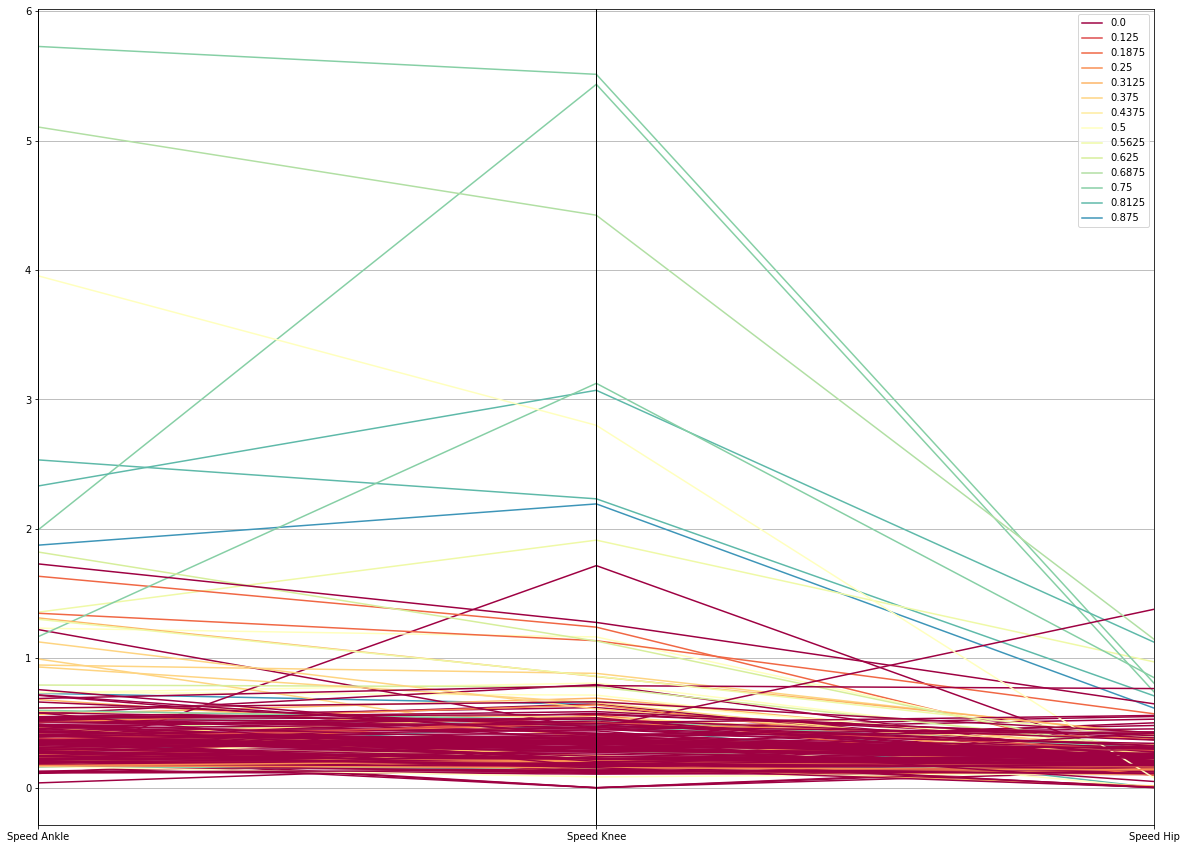

In [32]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
pd.plotting.parallel_coordinates(df_vel_mean_ly_y, class_column='CA lower', cols=['Speed Ankle', 'Speed Knee', 'Speed Hip'], color=colors)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)

In [33]:
df_dtl_median_ly_y = pd.concat([df_dtl_median_ly.ix[df_y_co.index], df_y_co], axis=1)
cmap = plt.cm.get_cmap('Spectral')
colors = [cmap(i) for i in df_dtl_median_ly_y['DYS lower'].unique()]

90


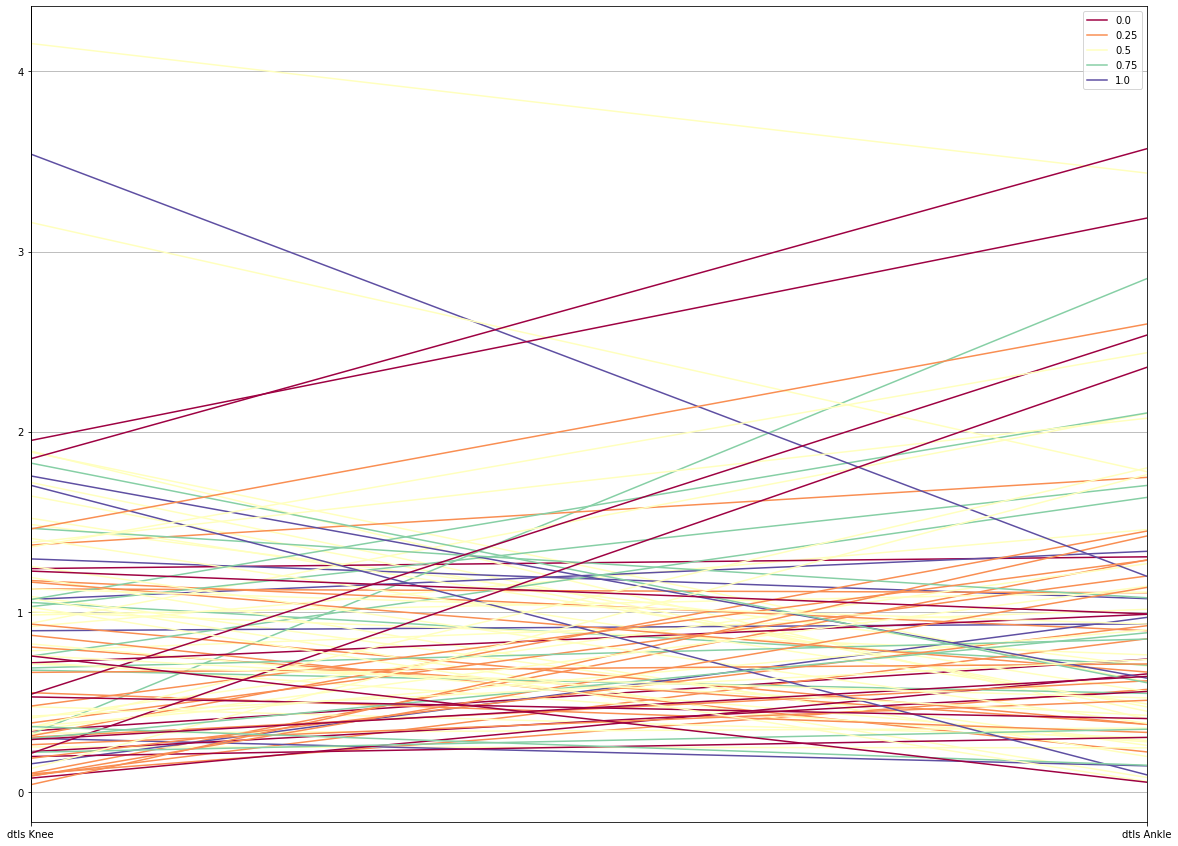

In [34]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
pd.plotting.parallel_coordinates(df_dtl_median_ly_y, class_column='DYS lower', cols=['dtls Knee', 'dtls Ankle'], color=colors)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
print(len(df_dtl_median_ly_y))
ax.legend(handles, labels)

In [35]:
df_dtl_median_ly_y = pd.concat([df_dtl_median_ly.ix[df_y.index], df_y], axis=1)
cmap = plt.cm.get_cmap('Spectral')
colors = [cmap(i) for i in df_dtl_median_ly_y['DYS lower'].unique()]

186


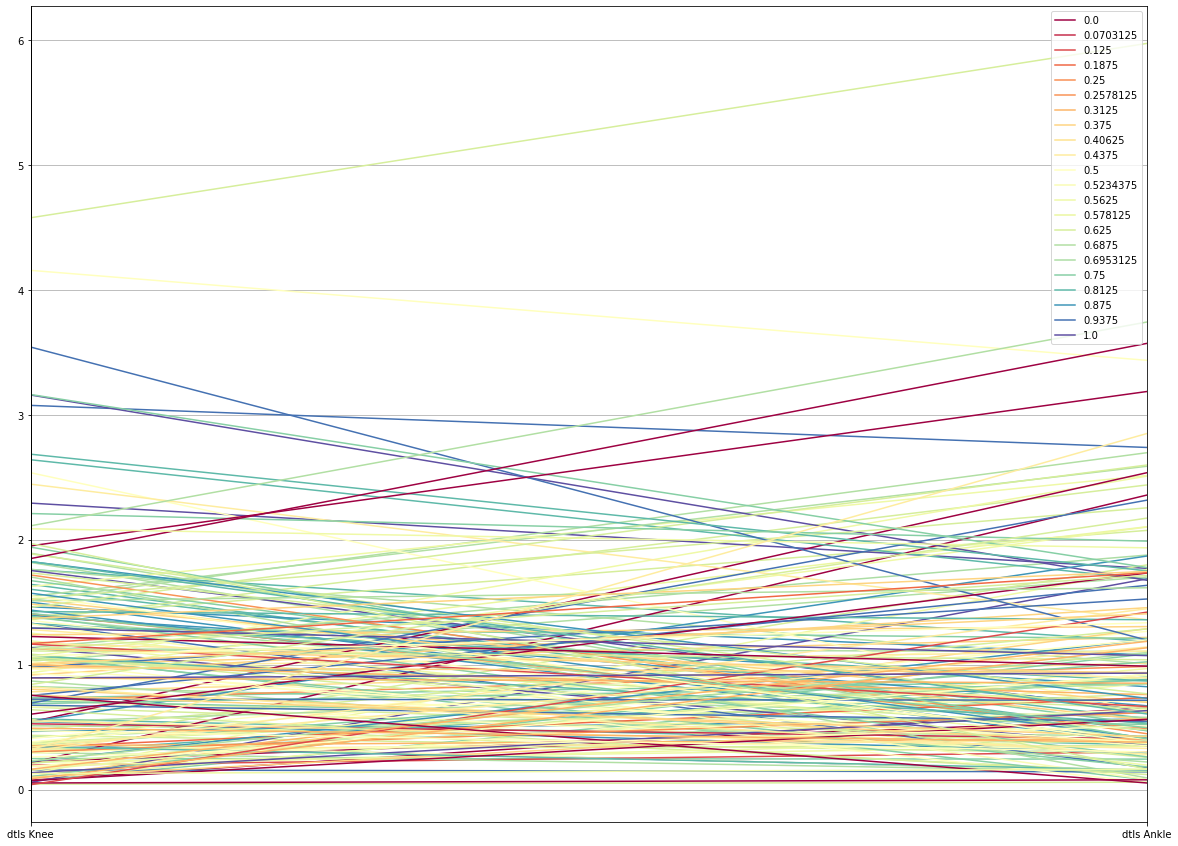

In [36]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
pd.plotting.parallel_coordinates(df_dtl_median_ly_y, class_column='DYS lower', cols=['dtls Knee', 'dtls Ankle'], color=colors)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
print(len(df_dtl_median_ly_y))
ax.legend(handles, labels)

### Standard Linear Regression

In [45]:
len(data)/2

62.0

Mean absolute error: 0.16
Variance score: 0.46

The mean absolute error is:  0.1618421052631579
The mean absolute error when making everything below 0.2 zero:  0.17105263157894737
The mean absolute error when predicting 0 everywhere:  0.618421052631579
The mean absolute error when predicting the mean everywhere:  0.23500611995104043
The mean absolute error when predicting the median everywhere:  0.23684210526315788


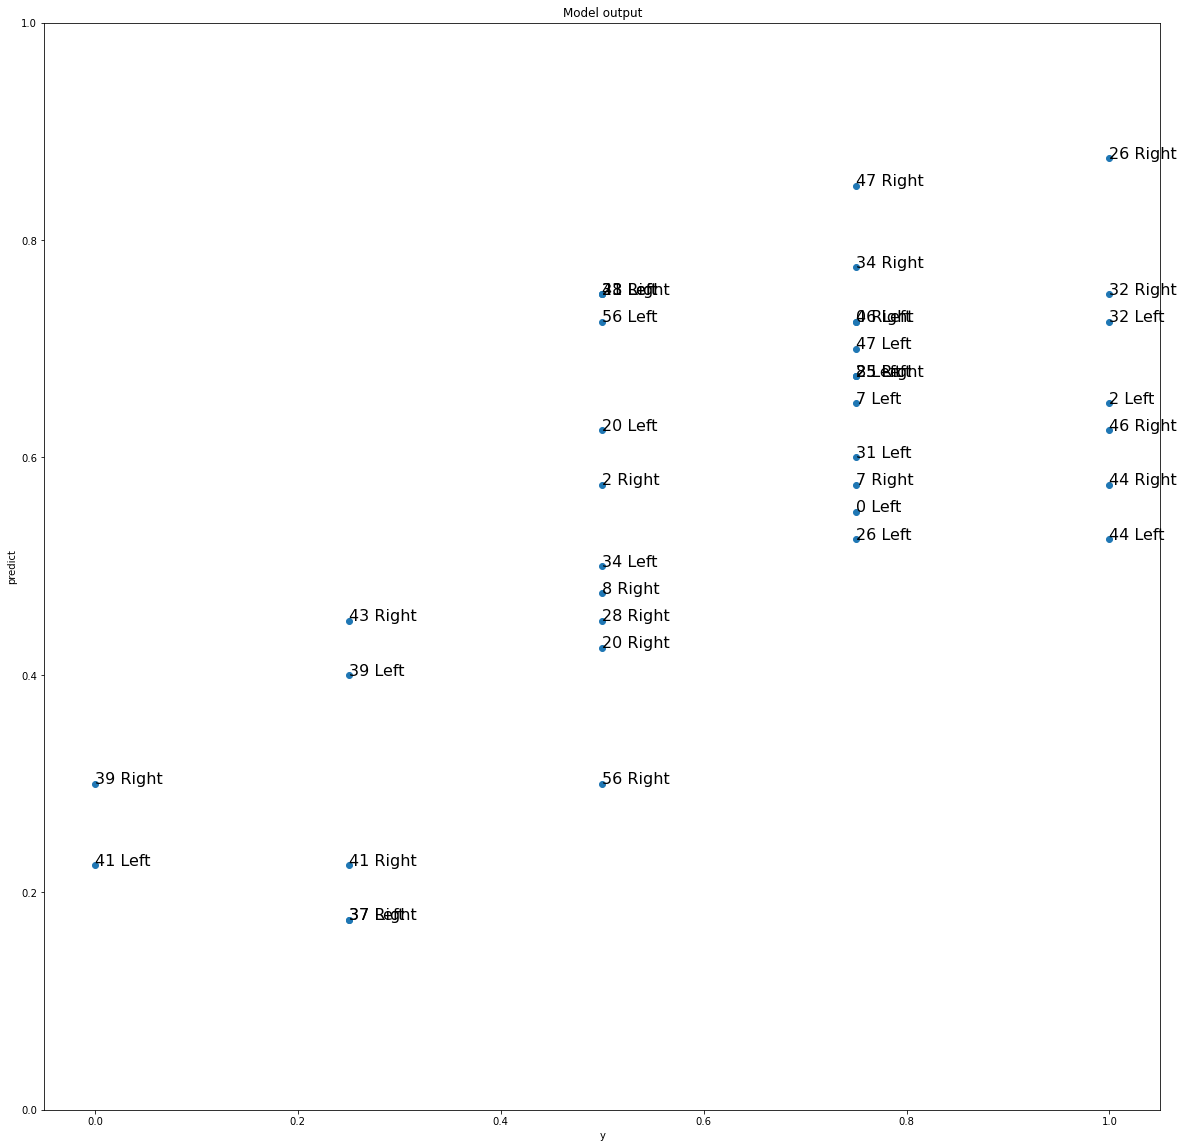

In [46]:
aif.run_plot_standard(data, int(len(data)/2), 1, RandomForestRegressor())

### Standard Random Forest Regressor

Mean absolute error: 0.16
Variance score: 0.07

The mean absolute error is:  0.15892857142857145
The mean absolute error when making everything below 0.2 zero:  0.13716517857142857
The mean absolute error when predicting 0 everywhere:  0.16517857142857142
The mean absolute error when predicting the mean everywhere:  0.20267857142857146
The mean absolute error when predicting the median everywhere:  0.16517857142857142


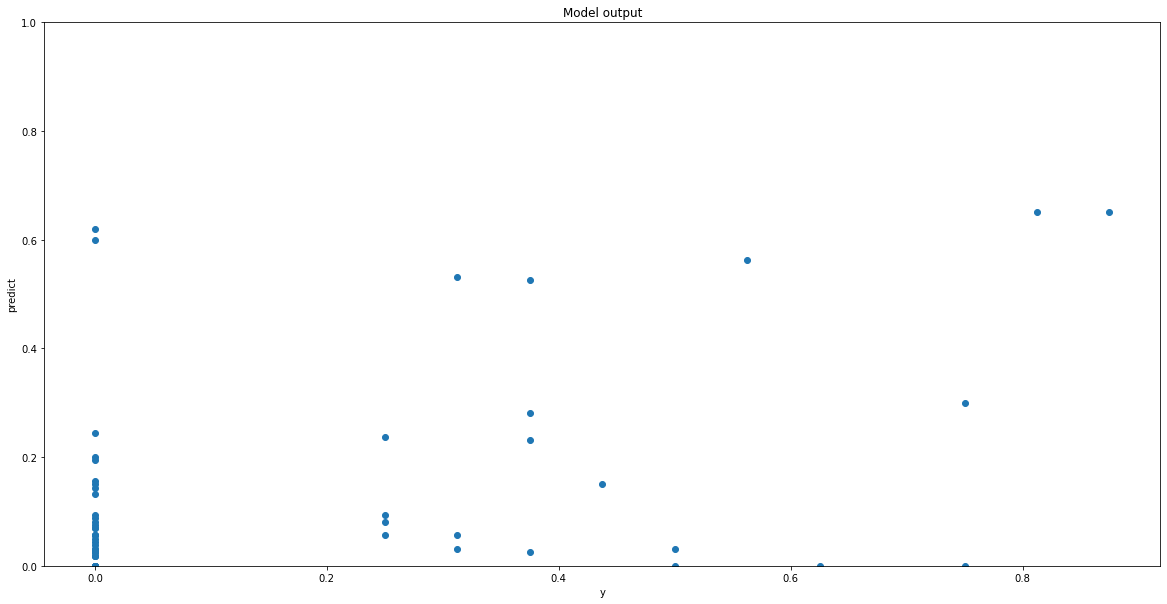

In [16]:
aif.run_plot_standard(data, settings['ntrials'], 1, RandomForestRegressor())

### Leave one out cross-validation: multiple repeats

In [19]:
testy, predy = aif.run_standard_LOO_experiment(data, settings['ntrials'], LinearRegression())

[0.659683235693497, 0.2641038905684089, 0.26875087499400163, 0.5193093818836481, 0.02623232177265236, 0.06609844600193679, 0.105224609375, 0.6226255279529508, 0.4146711739025022, 0.10600325609287609, 0.24570940833328392, 0.0660639329947601, 0.2310103719284941, 0.18612960023077507, 0.09100849500841507, 0.14179240859343942, 0.12960758248798776, 0.07507146122801972, 0.16487512134974847, 0.023607681537455766, 0.1875, 0.19698407860185407, 0.15569130999214617, 0.14560248222315988, 0.2563892098364101, 0.10347256329633316, 0.04914845393160289, 0.01277813057782426, 0.10873156001932369, 0.12282987830658038, 0.0840338083695932, 0.17221664468904477, 0.09708233976277297, 0.15548457194294935, 0.05512046815504085, 0.10804796507415261, 0.06790402070360835, 0.12303931283575585, 0.2076630415469693, 0.1002897111274329, 0.15718983901069183, 0.34973184087786374, 0.042209323121591535, 0.2609524142145391, 0.03125, 0.0390625, 0.07168051058364316, 0.04671910400010641, 0.3733358205091878, 0.09114591809018474, 0

0.15457755518961164


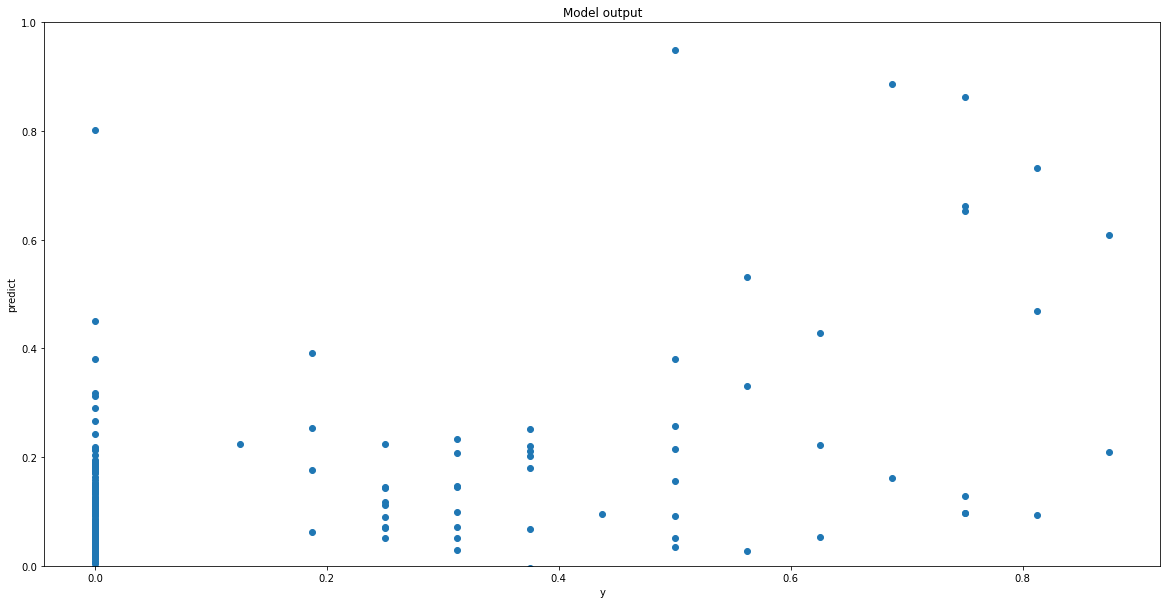

In [20]:
predy02 = [ 0 if x<0.18 else x for x in predy]
print(mean_absolute_error(testy, predy))
aif.plot_output(testy, predy, 'Model output', 'y', 'predict')

0.12365591397849462


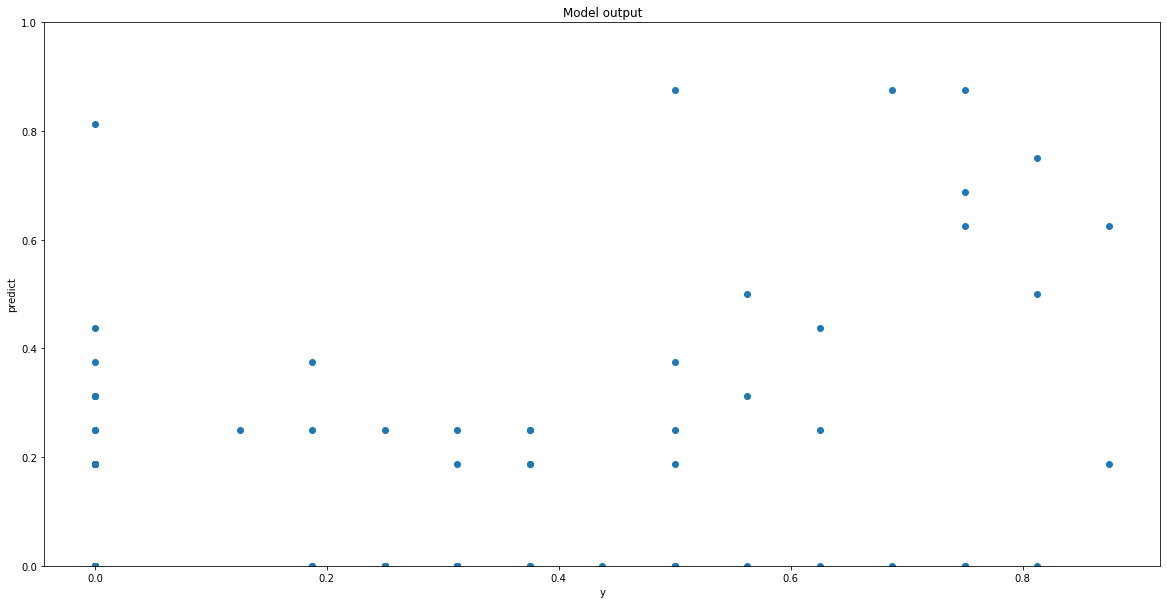

In [21]:
predy_class = [min(testy, key=lambda x:abs(x-value)) for value in predy02]
print(mean_absolute_error(testy, predy_class))
aif.plot_output(testy, predy_class, 'Model output', 'y', 'predict')

## 1D CNN

### Get data

In [208]:
df_vel_filled_ly = df_velocities_ly.applymap(lambda x: np.nan_to_num(x))
df_acc_filled_ly = df_accelerations_ly.applymap(lambda x: np.nan_to_num(x))

data = []
for index in indexes:
    data.append([df_vel_filled_ly['Speed Ankle'][index], 
                 df_vel_filled_ly['Speed Knee'][index],
                 df_y['CA lower'][index]])

In [222]:
df_xys_filled_ly = df_xys_ly.applymap(lambda x: np.nan_to_num(x))

data_all = []
for index in indexes:
    data_all.append([df_xys_filled_ly['Ankle x'][index], 
                 df_xys_filled_ly['Ankle y'][index],
                 df_xys_filled_ly['Knee x'][index], 
                 df_xys_filled_ly['Knee y'][index],
                 df_xys_filled_ly['Hip x'][index], 
                 df_xys_filled_ly['Hip y'][index],
                 df_y['DYS lower'][index]])

In [234]:
df_xys_filled_ly = df_xys_ly.applymap(lambda x: np.nan_to_num(x))

data = []
for index in indexes_co:
    data.append([df_xys_filled_ly['Ankle x'][index], 
                 df_xys_filled_ly['Ankle y'][index],
                 df_xys_filled_ly['Knee x'][index], 
                 df_xys_filled_ly['Knee y'][index],
                 df_xys_filled_ly['Hip x'][index], 
                 df_xys_filled_ly['Hip y'][index],
                 df_y_co['DYS lower'][index]])

In [230]:
df_dtls_filled_ly = df_dtls_ly.applymap(lambda x: np.nan_to_num(x))

data = []
for index in indexes_co:
    data.append([df_dtls_filled_ly['dtls Knee'][index], 
                 df_dtls_filled_ly['dtls Ankle'][index],
                 df_y_co['DYS lower'][index]])

### Simple Version

Mean absolute error: 0.1899


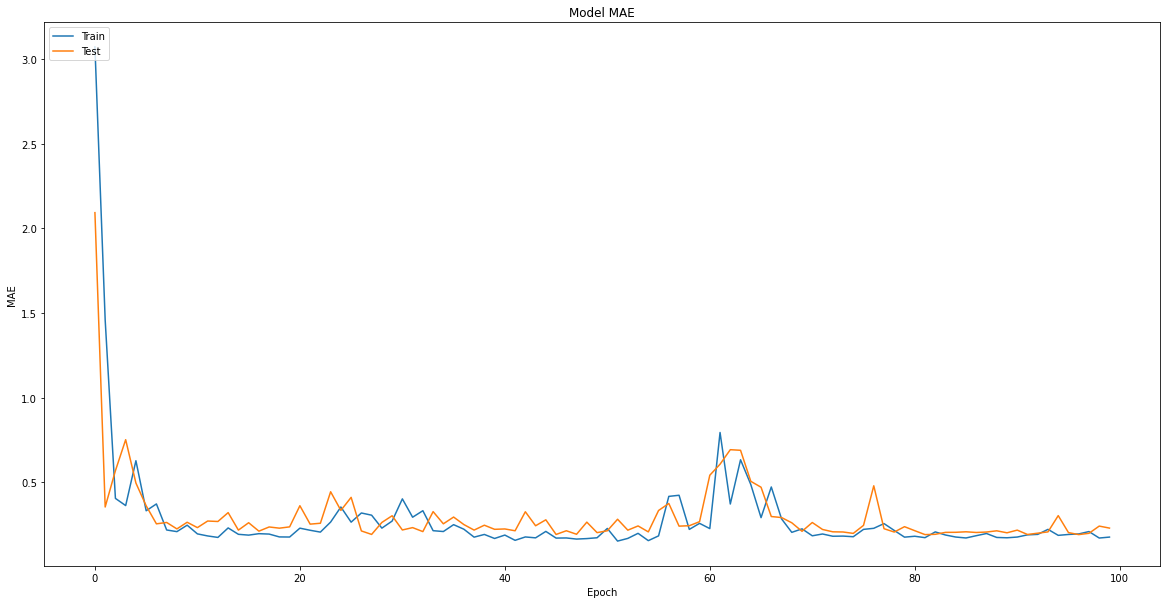

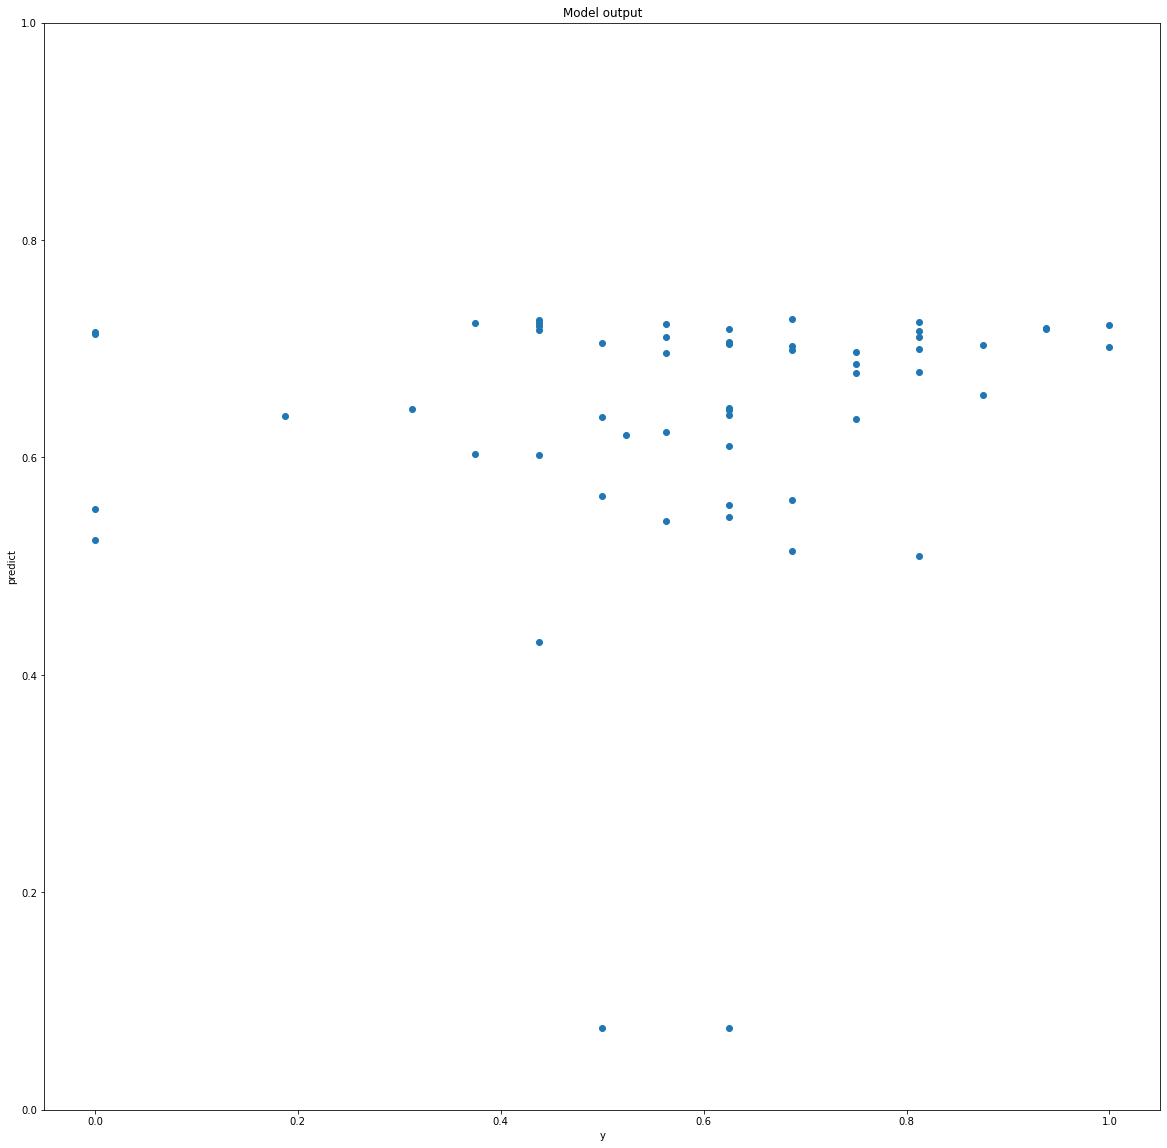

In [220]:
aif.run_plot_neural(data_all, settings['ntrials'], 1, ai_models.simple_CNN, ai_settings)

Mean absolute error: 0.1476


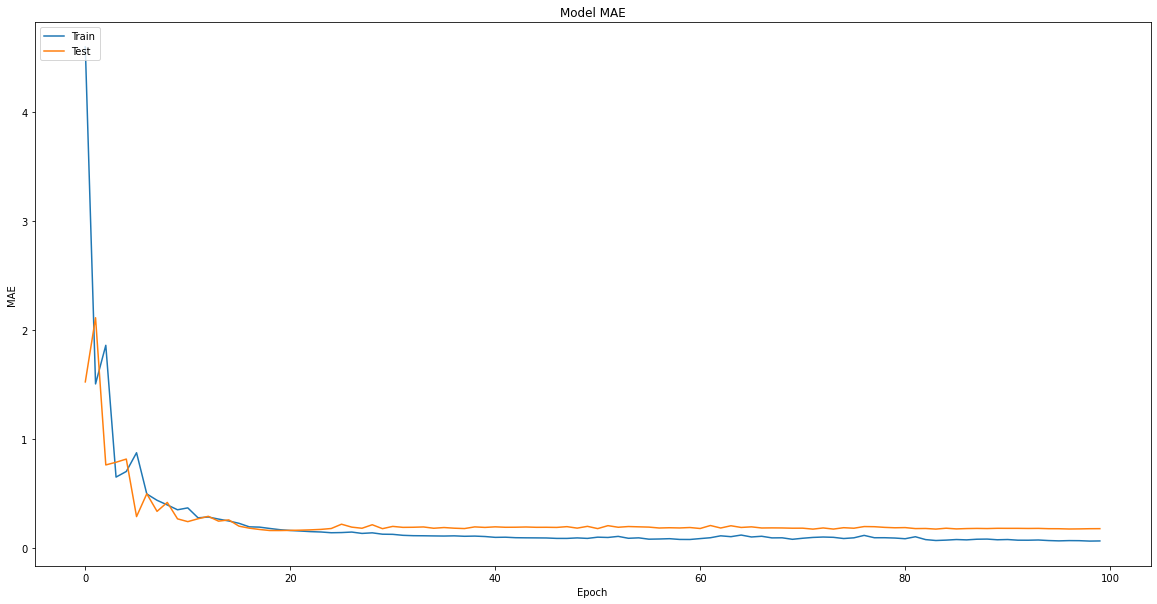

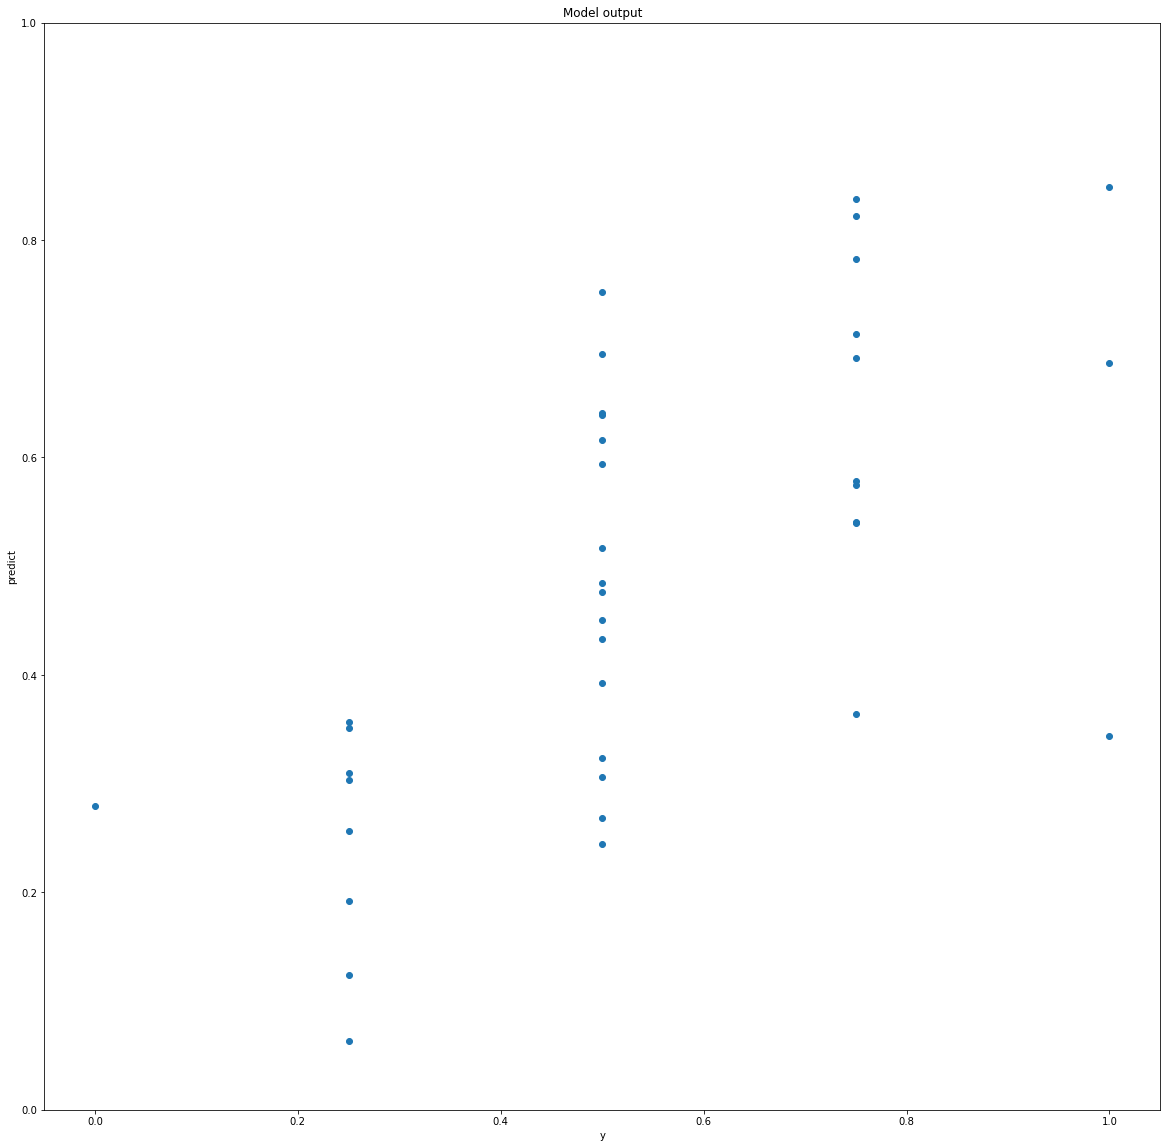

In [217]:
aif.run_plot_neural(data, 62, 1, ai_models.simple_CNN, ai_settings)

Mean absolute error: 0.2737


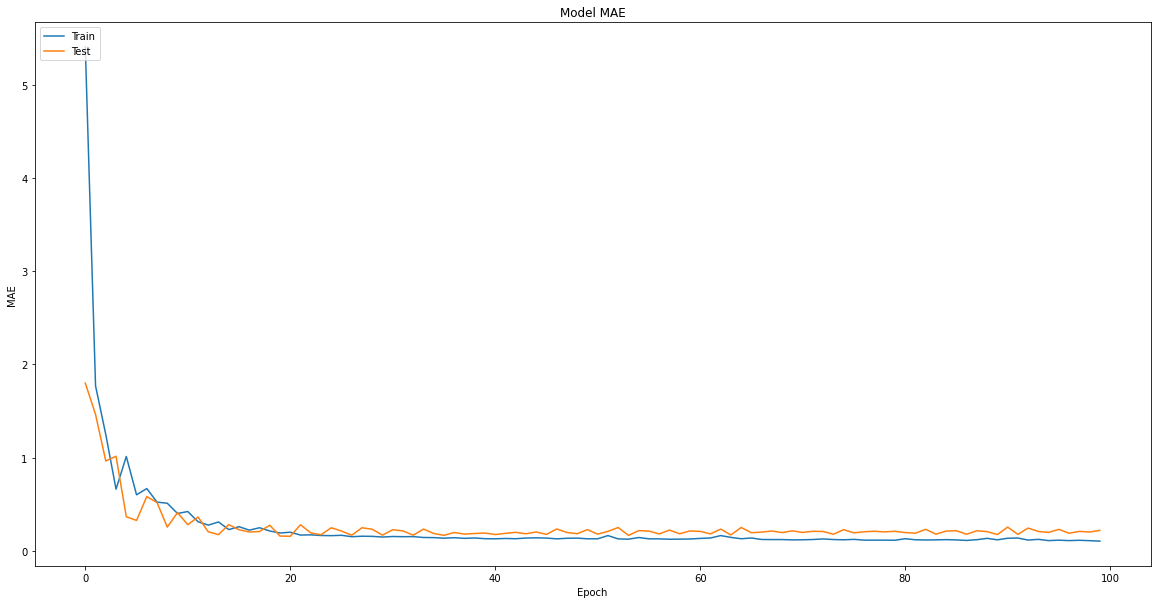

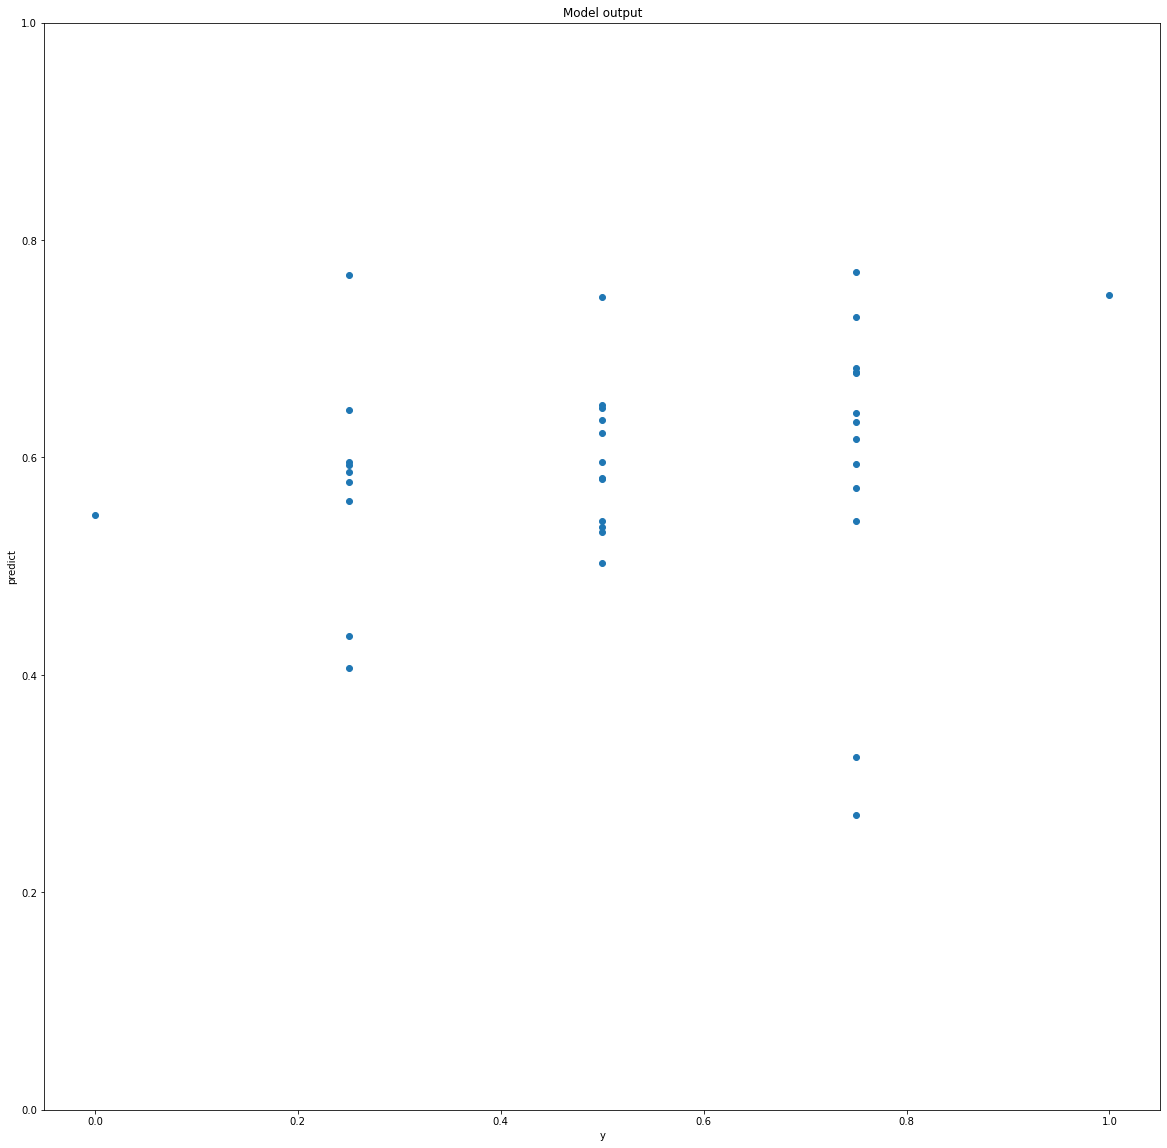

In [236]:
aif.run_plot_neural(data, 62, 1, ai_models.simple_CNN, ai_settings)

### Complex Version

Mean absolute error: 0.3009


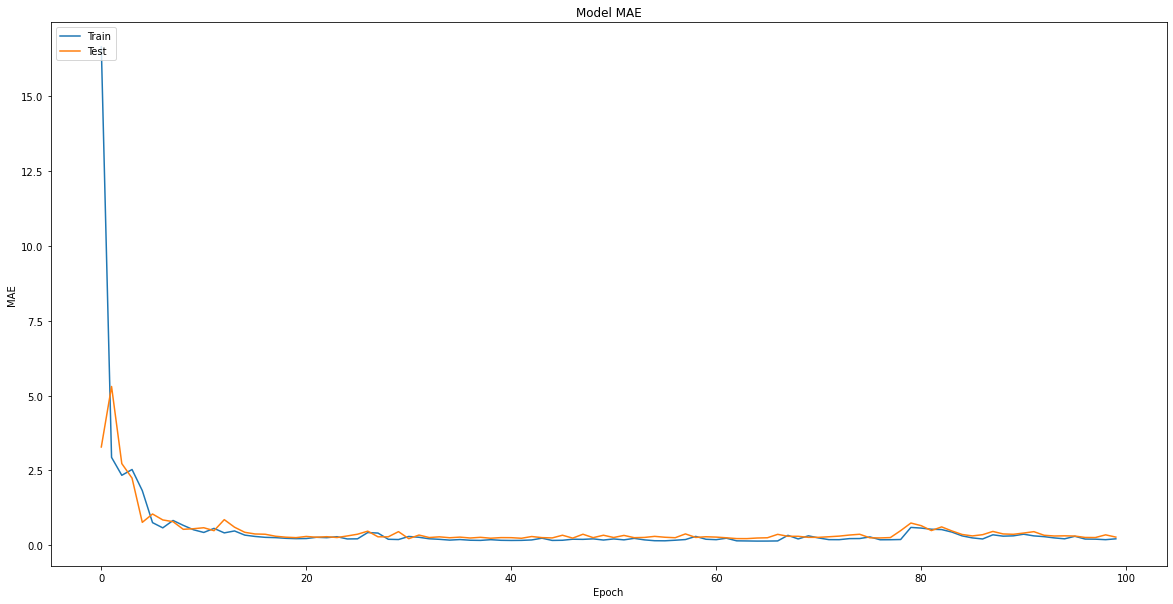

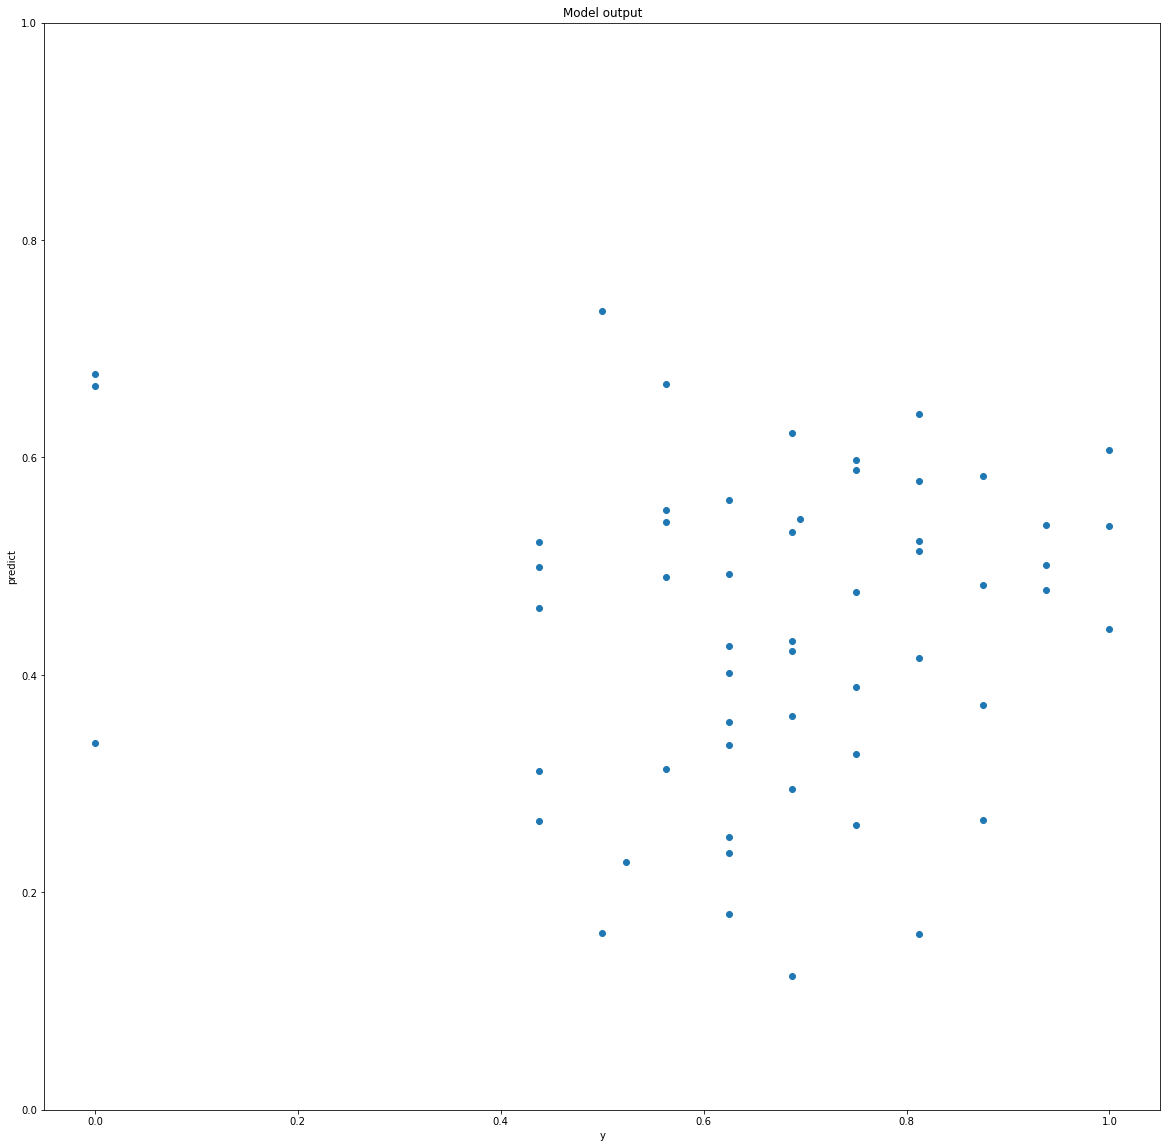

In [224]:
aif.run_plot_neural(data_all, settings['ntrials'], 1, ai_models.complex_CNN, ai_settings)

Mean absolute error: 0.2236


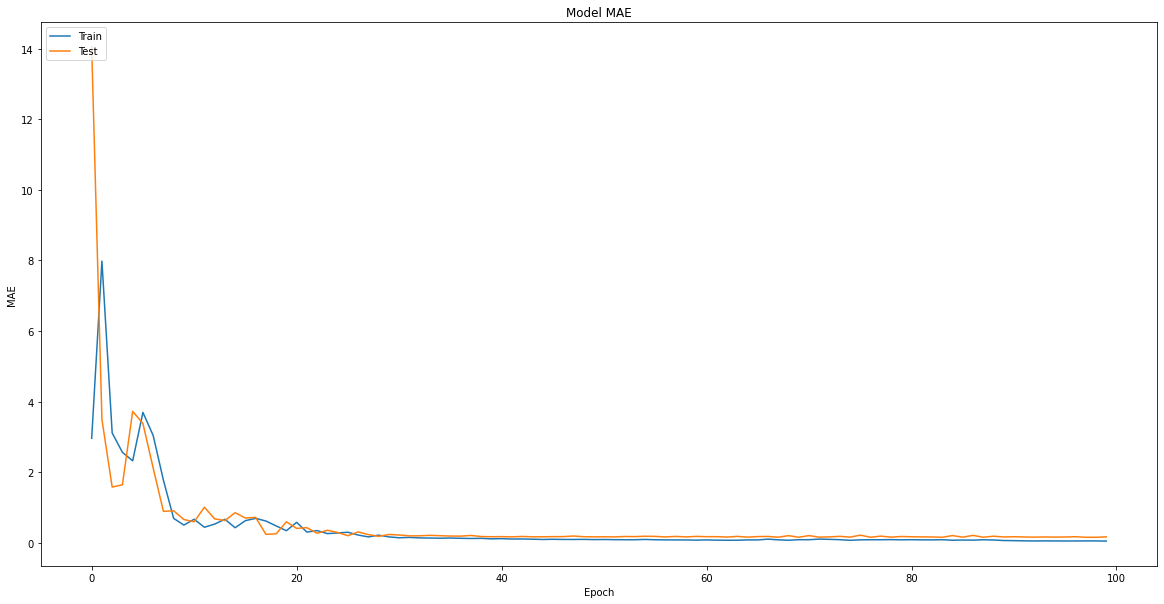

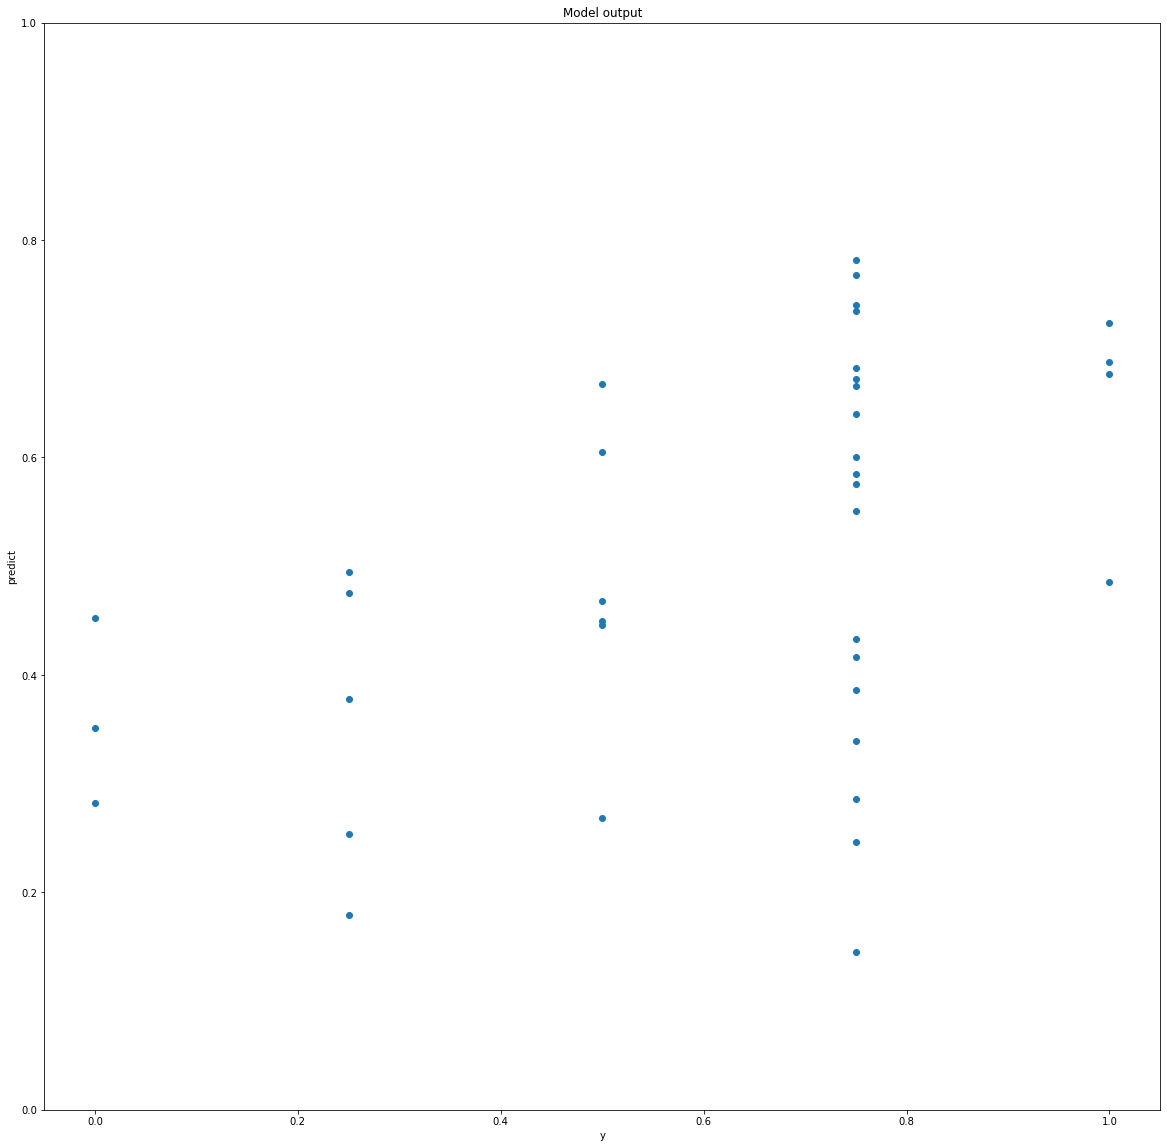

In [225]:
aif.run_plot_neural(data, 62, 1, ai_models.complex_CNN, ai_settings)

### Run multiple times, with shuffled data set

In [25]:
outps, scores, hists = aif.run_neural_experiment(data, 5, settings['ntrials'], 1, ai_models.simple_CNN, ai_settings)

>#1: 0.168
>#2: 0.184
>#3: 0.185
>#4: 0.157
>#5: 0.205
[0.1677093505859375, 0.18362614512443542, 0.18454085290431976, 0.15720319747924805, 0.20490820705890656]
MAE: 0.180 (+/-0.016)


In [26]:
outps, scores, hists = aif.run_neural_experiment(data, 5, settings['ntrials'], 1, ai_models.complex_CNN, ai_settings)

>#1: 0.212
>#2: 0.161
>#3: 0.145
>#4: 0.176
>#5: 0.186
[0.21209920942783356, 0.16072450578212738, 0.14549490809440613, 0.17604005336761475, 0.18622855842113495]
MAE: 0.176 (+/-0.023)


## 1D CNN with two outputs: DYS+CA

### Get Data

In [27]:
df_vel_filled_ly = df_velocities_ly.applymap(lambda x: np.nan_to_num(x))
df_acc_filled_ly = df_accelerations_ly.applymap(lambda x: np.nan_to_num(x))

data = []
for index in indexes:
    data.append([df_vel_filled_ly['Speed Ankle'][index], 
                 df_vel_filled_ly['Speed Knee'][index],
                 df_y['CA lower'][index],
                 df_y['DYS lower'][index]])

### Simple CNN double output

Mean absolute error: 0.2130


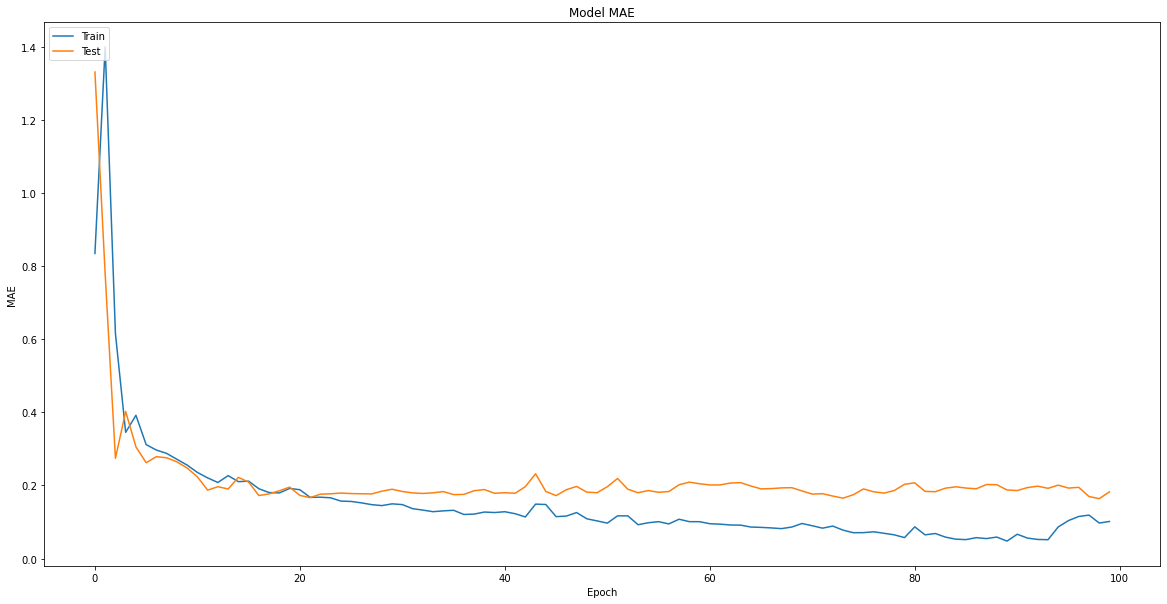

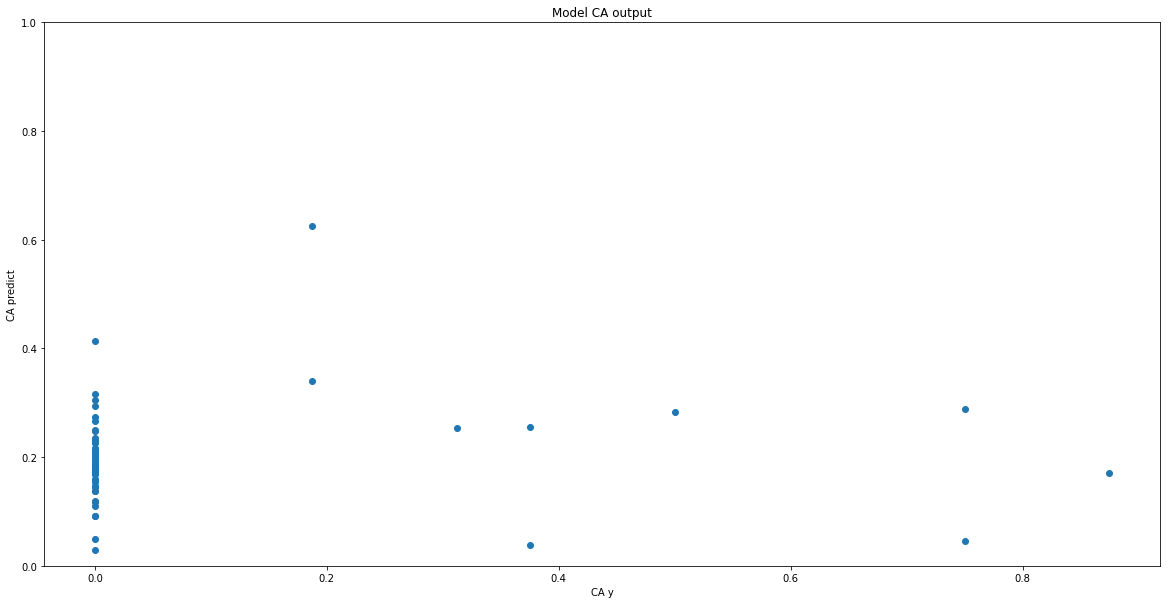

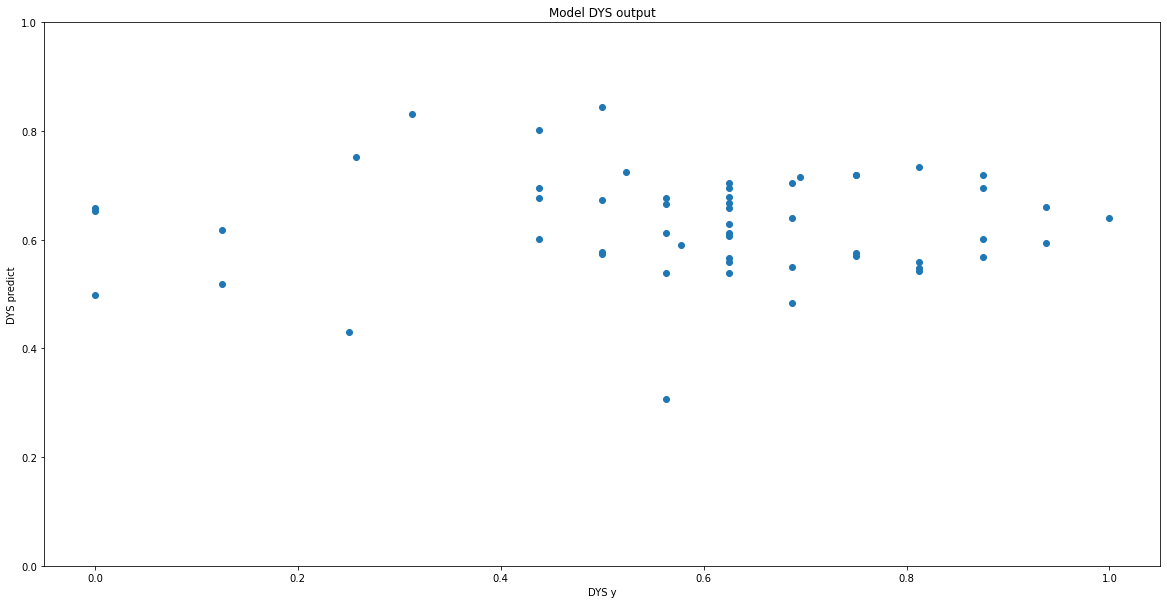

In [28]:
aif.run_plot_neural(data, settings['ntrials'], 2, ai_models.simple_CNN_double_output, ai_settings)

### Run multiple times, with shuffled data set

In [29]:
outps, scores, hists = aif.run_neural_experiment(data, 5, settings['ntrials'], 2, ai_models.simple_CNN_double_output, ai_settings)

>#1: 0.217
>#2: 0.230
>#3: 0.297
>#4: 0.203
>#5: 0.219
[0.21656060218811035, 0.2300921231508255, 0.2965170741081238, 0.20342278480529785, 0.21932537853717804]
MAE: 0.233 (+/-0.033)


## LSTM

In [30]:
df_vel_filled_ly = df_velocities_ly.applymap(lambda x: np.nan_to_num(x))
df_acc_filled_ly = df_accelerations_ly.applymap(lambda x: np.nan_to_num(x))

data = []
for index in indexes:
    data.append([df_vel_filled_ly['Speed Ankle'][index], 
                 df_vel_filled_ly['Speed Knee'][index],
                 df_y['CA lower'][index]])

In [31]:
ai_settings['epochs'] = 10

### Simple LSTM

Mean absolute error: 0.2081


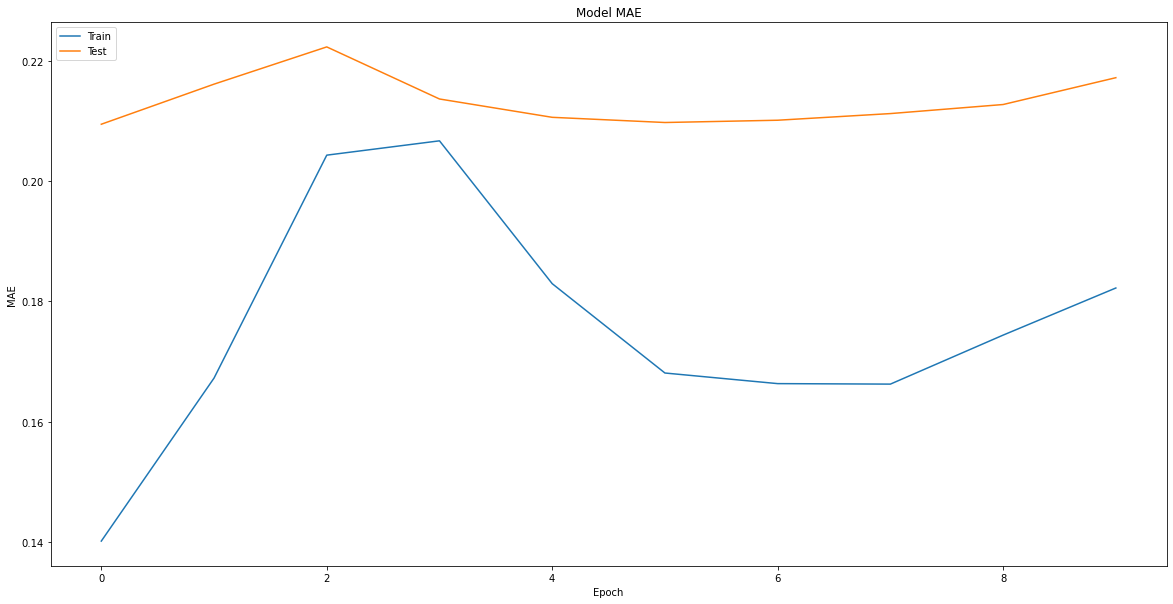

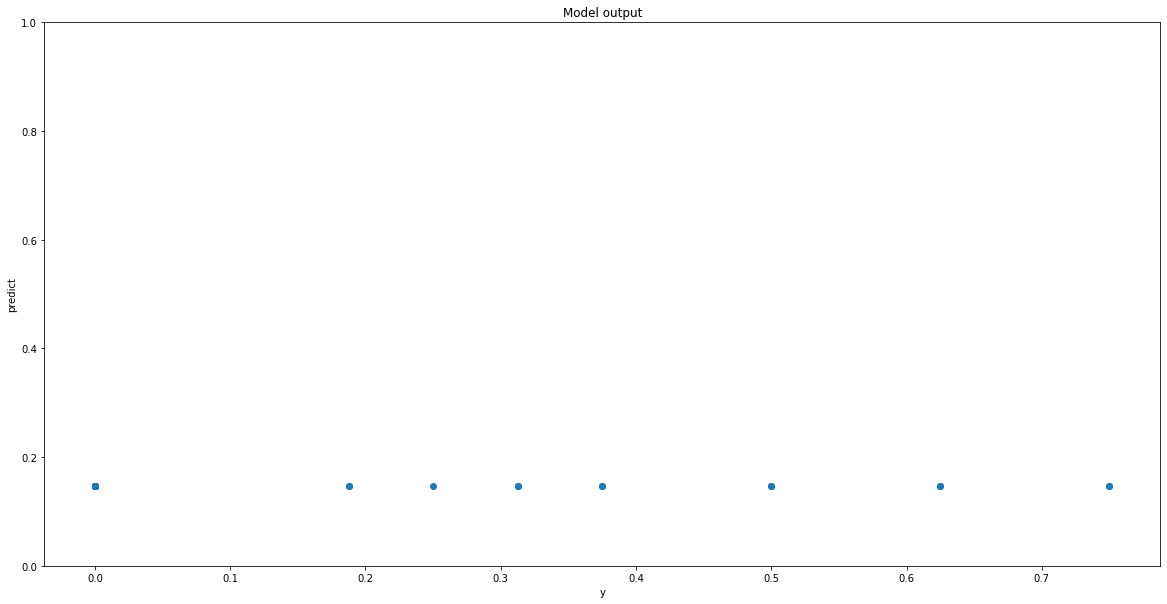

In [33]:
aif.run_plot_neural(data, settings['ntrials'], 1, ai_models.simple_LSTM, ai_settings)

### Complex LSTM

Mean absolute error: 0.1810


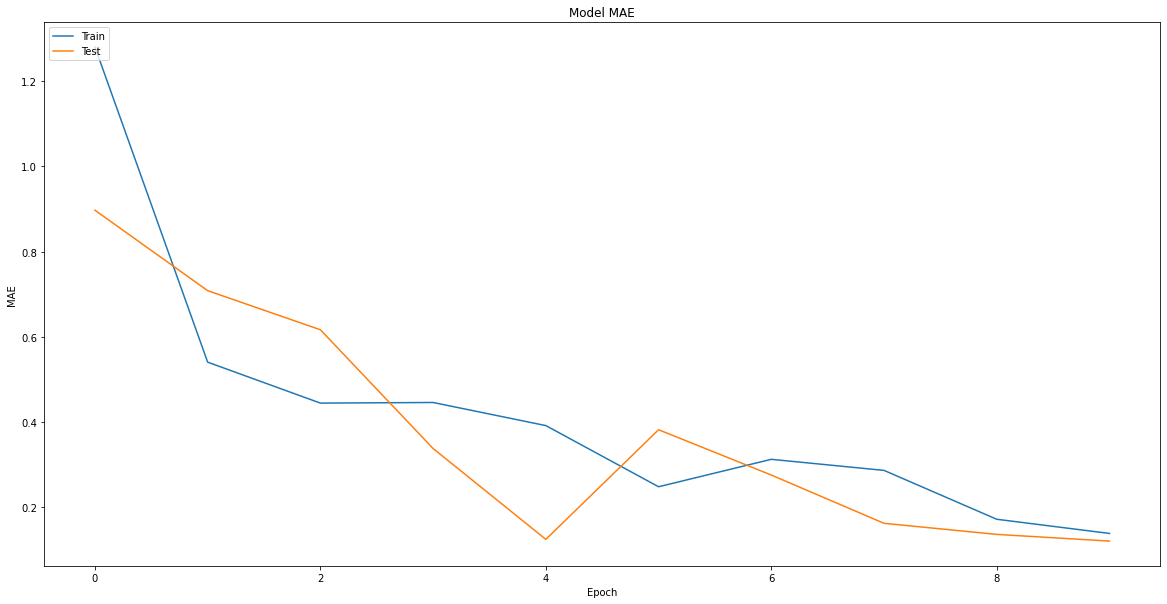

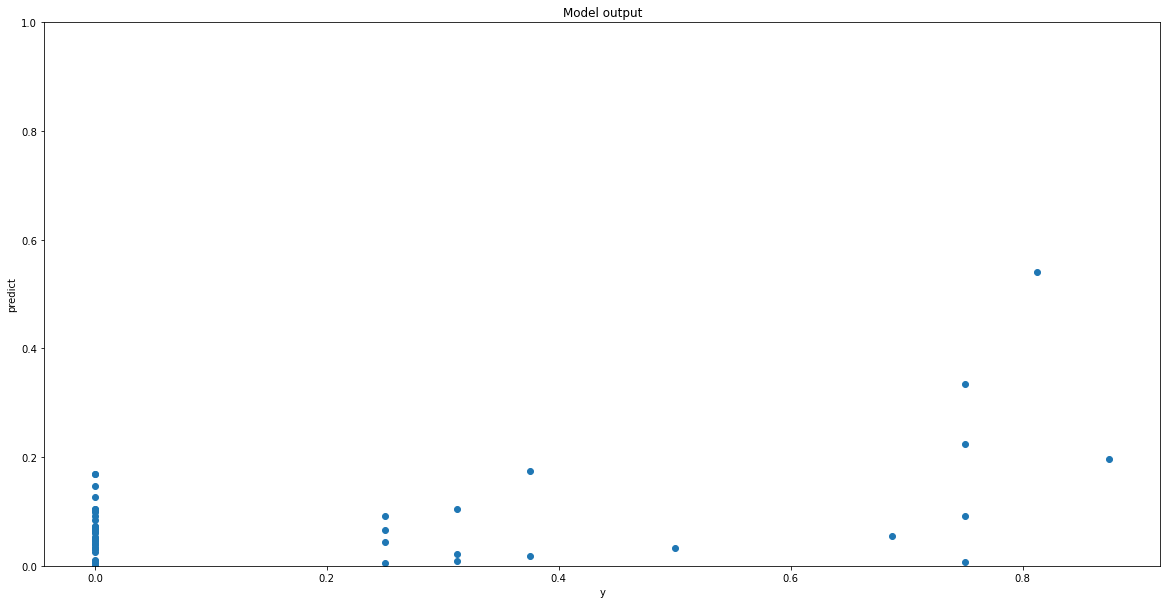

In [35]:
aif.run_plot_neural(data, settings['ntrials'], 1, ai_models.complex_LSTM, ai_settings)